# Project 5 Vehicle Detection

**Author: olala7846@gmail.com**

## Step 1: train a image vehicle classifier

In [61]:
# first do some training data observation
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import random


vehicle_imgs = list(glob.glob('./vehicles/**/*.png'))
nonvehicle_imgs = list(glob.glob('./non-vehicles/**/*.png'))

print('Total %d vehicle images' % len(vehicle_imgs))
print('Total %d non-vehicle images' % len(nonvehicle_imgs))
print('There are about the same size of both classes')

sample_img = random.sample(vehicle_imgs, 1)[0]
img = cv2.imread(sample_img)
print('images has shape', img.shape, 'and dtype', img.dtype)
print('Pixel value range approximately from', np.max(img), 'to', np.min(img))

Total 8792 vehicle images
Total 8968 non-vehicle images
There are about the same size of both classes
images has shape (64, 64, 3) and dtype uint8
Pixel value range approximately from 246 to 3


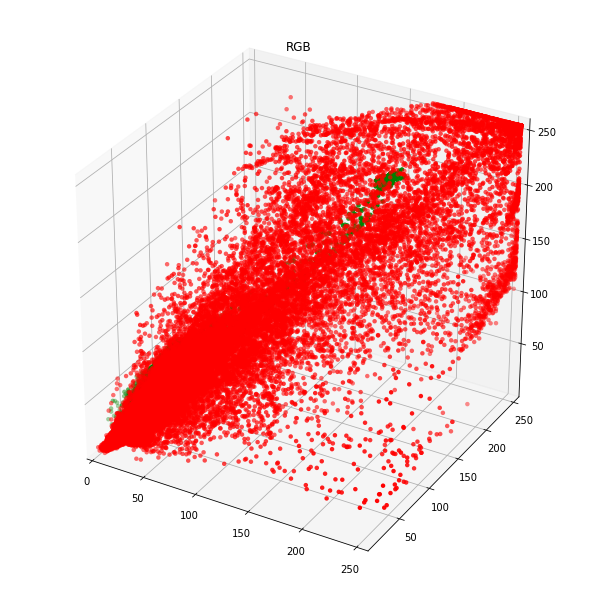

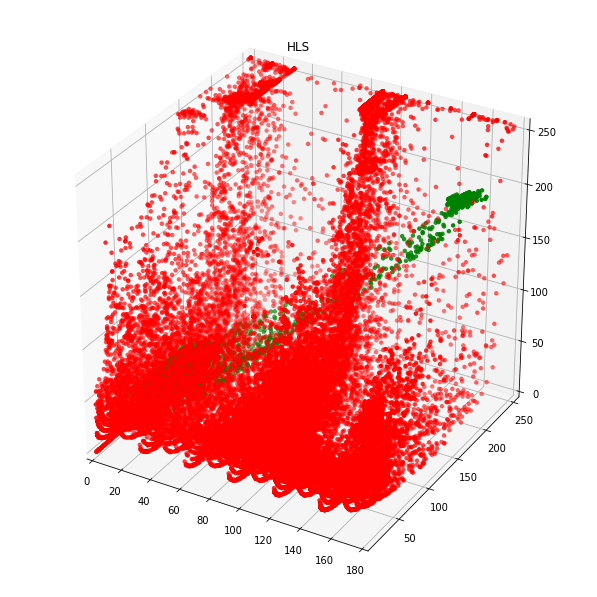

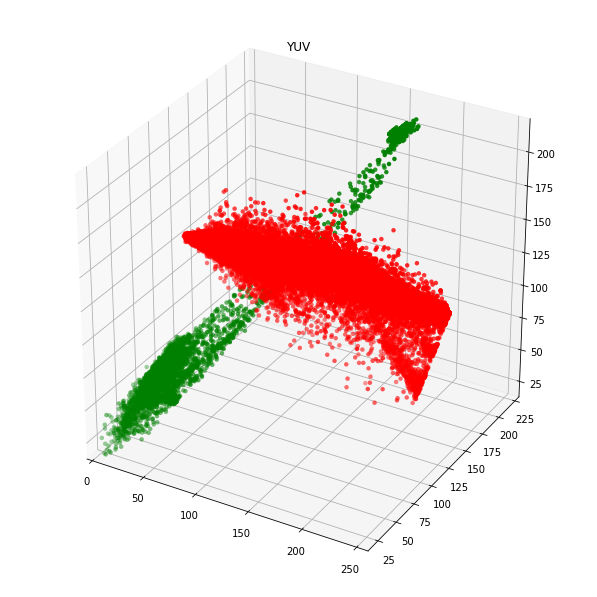

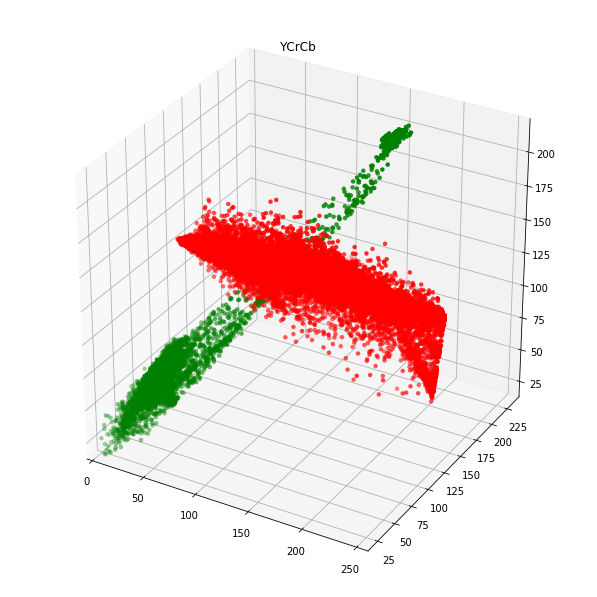

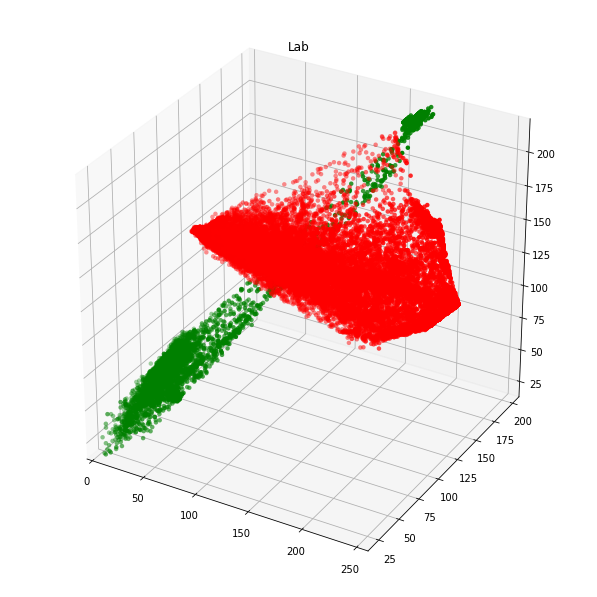

In [74]:
# Explore different color space
from mpl_toolkits.mplot3d import Axes3D

def plot3d(car_pixels, non_car_pixels):
    """Plot pixels in 3D"""
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)
    
    all_pixels = np.vstack((car_pixels, non_car_pixels))

    # Set axis limits
    ax.set_xlim(np.min(all_pixels[:, 0]), np.max(all_pixels[:, 0]))
    ax.set_ylim(np.min(all_pixels[:, 1]), np.max(all_pixels[:, 1]))
    ax.set_zlim(np.min(all_pixels[:, 2]), np.max(all_pixels[:, 2]))

    ax.scatter(
        car_pixels[:, 0].ravel(),
        car_pixels[:, 1].ravel(),
        car_pixels[:, 2].ravel(),
        c='r', edgecolors='none')

    ax.scatter(
        non_car_pixels[:, 0].ravel(),
        non_car_pixels[:, 1].ravel(),
        non_car_pixels[:, 2].ravel(),
        c='g', edgecolors='none')
    
    return ax

sample_car_imgs = random.sample(vehicle_imgs, 10)
sample_noncar_imgs = random.sample(nonvehicle_imgs, 10)

convertors = [
    ('RGB', cv2.COLOR_BGR2RGB),
    ('HLS', cv2.COLOR_BGR2HLS),
    ('YUV', cv2.COLOR_BGR2YUV),
    ('YCrCb', cv2.COLOR_BGR2YCrCb),
    ('Lab', cv2.COLOR_BGR2Lab),
]

for name, convertor in convertors:
    car_pixels = []
    noncar_pixels = []

    for car_img in sample_car_imgs:
        img = cv2.imread(car_img)
        img = cv2.cvtColor(img, convertor)
        car_pixels.append(np.reshape(img, (-1, 3)))

    for noncar_img in sample_noncar_imgs:
        img = cv2.imread(noncar_img)
        img = cv2.cvtColor(img, convertor)
        noncar_pixels.append(np.reshape(img, (-1, 3)))

    car_pixels = np.concatenate(car_pixels)
    noncar_pixels = np.concatenate(noncar_pixels)

    plot3d(car_pixels, non_car_pixels)
    plt.title(name)
    # plt.savefig('./color_spaces/%s.png' % name)
    plt.show()

### Color space
After tested on mandy color spaces, it's easy to see that some (e.g. YUV, YCrCb) does a better job seperating vehicle and non-vehicle images. I will choose 

In [ ]:



# def plot3d(pixels, colors_rgb, axis_labels=list("RGB"), axis_limits=[(0, 255), (0, 255), (0, 255)]):
#     """Plot pixels in 3D."""

#     # Create figure and 3D axes
#     fig = plt.figure(figsize=(8, 8))
#     ax = Axes3D(fig)

#     # Set axis limits
#     ax.set_xlim(*axis_limits[0])
#     ax.set_ylim(*axis_limits[1])
#     ax.set_zlim(*axis_limits[2])

#     # Set axis labels and sizes
#     ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
#     ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
#     ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
#     ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

#     # Plot pixel values with colors given in colors_rgb
#     ax.scatter(
#         pixels[:, :, 0].ravel(),
#         pixels[:, :, 1].ravel(),
#         pixels[:, :, 2].ravel(),
#         c='colors_rgb.reshape((-1, 3))', edgecolors='none')

#     return ax  # return Axes3D object for further manipulation


# # Read a color image
# img = cv2.imread("./test_images/test1.jpg")

# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# # Select a small fraction of pixels to plot by subsampling it
# scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
# img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

# # Convert subsampled image to desired color space(s)
# img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
# img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
# img_small_HLS = cv2.cvtColor(img_small, cv2.COLOR_BGR2HLS)
# img_small_YCrCb = cv2.cvtColor(img_small, cv2.COLOR_BGR2YCrCb)
# img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting

# # Plot and show
# plot3d(img_small_RGB, img_small_rgb)
# plt.show()

# plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
# plt.show()

# plot3d(img_small_HLS, img_small_rgb, axis_labels=list("HLS"))
# plt.show()

# plot3d(img_small_YCrCb, img_small_rgb, axis_labels=['Y', 'Cr', 'Cb'])
# plt.show()


In [ ]:

# Feature extraction
# TODO(Olala): color_bin
# TODO(Olala): histogram of color intensity
# TODO(Olala): HOG
# Already implementd by some library
# TODO(Olala): try on different color spaces



In [37]:
a = np.array([
    [[0,0,1], [0,0,1], [0,0,1], [0,0,1]],
    [[0,1,0], [0,1,0], [0,1,0], [0,1,0]],
    [[1,0,0], [1,0,0], [1,0,0], [1,0,0]],
    [[0,1,1], [0,1,1], [0,1,1], [0,1,1]],
    [[1,1,0], [1,1,0], [1,1,0], [1,1,0]],
    [[1,0,1], [1,0,1], [1,0,1], [1,0,1]],
])

print(a)
print(a.shape)
b = np.reshape(a, (-1, 3))
print(b)
print(b.shape)

[[[0 0 1]
  [0 0 1]
  [0 0 1]
  [0 0 1]]

 [[0 1 0]
  [0 1 0]
  [0 1 0]
  [0 1 0]]

 [[1 0 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]]

 [[0 1 1]
  [0 1 1]
  [0 1 1]
  [0 1 1]]

 [[1 1 0]
  [1 1 0]
  [1 1 0]
  [1 1 0]]

 [[1 0 1]
  [1 0 1]
  [1 0 1]
  [1 0 1]]]
(6, 4, 3)
[[0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 1]
 [0 1 1]
 [0 1 1]
 [0 1 1]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]
(24, 3)
